In [1]:
import pandas as pd
import gzip
import numpy as np

filePath_train_set = '/cxldata/datasets/project/fashion-mnist/train-images-idx3-ubyte.gz'
filePath_train_label = '/cxldata/datasets/project/fashion-mnist/train-labels-idx1-ubyte.gz'

filePath_test_set = '/cxldata/datasets/project/fashion-mnist/t10k-images-idx3-ubyte.gz'
filePath_test_label = '/cxldata/datasets/project/fashion-mnist/t10k-labels-idx1-ubyte.gz'

with gzip.open(filePath_train_label, 'rb') as trainLbpath:
     trainLabel = np.frombuffer(trainLbpath.read(), dtype=np.uint8,
                               offset=8)
with gzip.open(filePath_train_set, 'rb') as trainSetpath:
     trainSet = np.frombuffer(trainSetpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(trainLabel), 784)

with gzip.open(filePath_test_label, 'rb') as testLbpath:
     testLabel = np.frombuffer(testLbpath.read(), dtype=np.uint8,
                               offset=8)

with gzip.open(filePath_test_set, 'rb') as testSetpath:
     testSet = np.frombuffer(testSetpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(testLabel), 784)

print(type(testLabel))

print(trainSet.shape)

print(trainLabel.shape)

print(testSet.shape)

print(testLabel.shape)

<class 'numpy.ndarray'>
(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [2]:
X_train, X_test, y_train, y_test = trainSet, testSet, trainLabel, testLabel

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [3]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

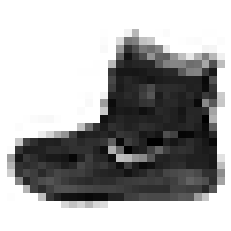

In [4]:
def showImage(data):
    some_article = data
    some_article_image = some_article.reshape(28, 28) # Reshaping it to get the 28x28 pixels
    plt.imshow(some_article_image, cmap = matplotlib.cm.binary, interpolation="nearest")
    plt.axis("off")
    plt.show()
    
showImage(X_train[0])

In [8]:
y_train[0]

9

In [5]:
import numpy as np
np.random.seed(42)   # if you want reproducible results set the random seed value.
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

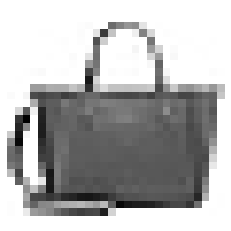

In [10]:
showImage(X_train[0])

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))

In [11]:
# Let us import some libraries that we will use quite often
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score

In [12]:
from sklearn.linear_model import SGDClassifier

In [13]:
sgd_clf = SGDClassifier(random_state=42) 

In [12]:
sgd_clf.fit(X_train_scaled, y_train)

/usr/local/anaconda/lib/python3.6/site-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [13]:
y_train_predict = sgd_clf.predict(X_train[0].reshape(1, -1))

In [14]:
y_train[0]

8

In [15]:
y_train_predict[0]

8

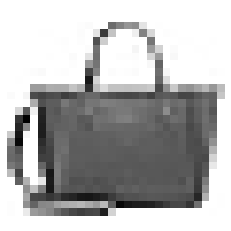

In [16]:
showImage(X_train[0])

In [17]:
y_train_predict = sgd_clf.predict(X_train_scaled)

In [18]:
sgd_accuracy = accuracy_score(y_train, y_train_predict)
sgd_precision = precision_score(y_train, y_train_predict, average='weighted')
sgd_recall = recall_score(y_train, y_train_predict, average='weighted')
sgd_f1_score = f1_score(y_train, y_train_predict, average='weighted')


print("SGD Accuracy: ", sgd_accuracy)
print("SGD Precision: ", sgd_precision)
print("SGD Recall: ", sgd_precision)
print("SGD F1 Score: ", sgd_f1_score)

SGD Accuracy:  0.8489
SGD Precision:  0.8493628950770987
SGD Recall:  0.8493628950770987
SGD F1 Score:  0.8487538349065629


In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
log_clf = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10, random_state=42)

In [27]:
log_clf.fit(X_train_scaled, y_train)

/usr/local/anaconda/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [22]:
y_train_predict = log_clf.predict(X_train[0].reshape(1, -1))

In [24]:
y_train[0]

8

In [25]:
y_train_predict[0]

8

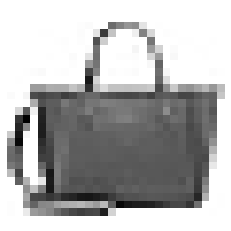

In [26]:
showImage(X_train[0])

In [27]:
y_train_predict = log_clf.predict(X_train_scaled)

In [28]:
log_accuracy = accuracy_score(y_train, y_train_predict)
log_precision = precision_score(y_train, y_train_predict, average='weighted')
log_recall = recall_score(y_train, y_train_predict, average='weighted')
log_f1_score = f1_score(y_train, y_train_predict, average='weighted')


print("Logistic Accuracy: ", log_accuracy)
print("Logistic Precision: ", log_precision)
print("Logistic Recall: ", log_precision)
print("Logistic F1 Score: ", log_f1_score)

Logistic Accuracy:  0.87755
Logistic Precision:  0.8766648092442357
Logistic Recall:  0.8766648092442357
Logistic F1 Score:  0.8769448048542856


In [24]:
from sklearn.tree import DecisionTreeClassifier

In [12]:
dec_tree_clf = DecisionTreeClassifier(max_depth=50, random_state=42)
# Scaling is not needed for Decision Tree algorithm and hence for Random Forest and XGBoost algorithms as they 
# are also based on Decision Trees. Hence, not using scaled training dataset here
dec_tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=50, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [31]:
y_train_predict = dec_tree_clf.predict(X_train[0].reshape(1, -1))

In [32]:
y_train[0]

8

In [33]:
y_train_predict[0]

8

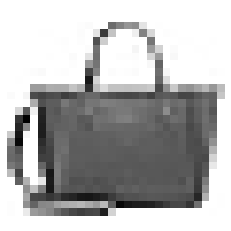

In [34]:
showImage(X_train[0])

In [35]:
y_train_predict = dec_tree_clf.predict(X_train)

In [36]:
dec_tree_accuracy = accuracy_score(y_train, y_train_predict)
dec_tree_precision = precision_score(y_train, y_train_predict, average='weighted')
dec_tree_recall = recall_score(y_train, y_train_predict, average='weighted')
dec_tree_f1_score = f1_score(y_train, y_train_predict, average='weighted')


print("Decision Tree Accuracy: ", dec_tree_accuracy)
print("Decision Tree Precision: ", dec_tree_precision)
print("Decision Tree Recall: ", dec_tree_precision)
print("Decision Tree F1 Score: ", dec_tree_f1_score)

Decision Tree Accuracy:  1.0
Decision Tree Precision:  1.0
Decision Tree Recall:  1.0
Decision Tree F1 Score:  1.0


In [25]:
from sklearn.ensemble import RandomForestClassifier

In [36]:
rnd_clf = RandomForestClassifier(n_estimators=100, max_depth=50, random_state=42)
# Scaling is not needed for Decision Tree algorithm and hence for Random Forest and XGBoost algorithms as they 
# are also based on Decision Trees. Hence, not using scaled training dataset here
rnd_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=50, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [39]:
y_train_predict = rnd_clf.predict(X_train[0].reshape(1, -1))

In [40]:
y_train[0]

8

In [41]:
y_train_predict[0]

8

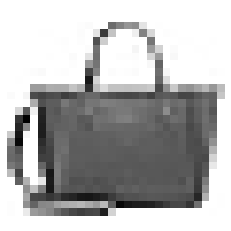

In [42]:
showImage(X_train[0])

In [43]:
y_train_predict = rnd_clf.predict(X_train)

In [44]:
rnd_accuracy = accuracy_score(y_train, y_train_predict)
rnd_precision = precision_score(y_train, y_train_predict, average='weighted')
rnd_recall = recall_score(y_train, y_train_predict, average='weighted')
rnd_f1_score = f1_score(y_train, y_train_predict, average='weighted')


print("Random Forest Accuracy: ", rnd_accuracy)
print("Random Forest Precision: ", rnd_precision)
print("Random Forest Recall: ", rnd_precision)
print("Random Forest F1 Score: ", rnd_f1_score)

Random Forest Accuracy:  1.0
Random Forest Precision:  1.0
Random Forest Recall:  1.0
Random Forest F1 Score:  1.0


In [26]:
from sklearn.ensemble import VotingClassifier

log_clf_ens = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10, random_state=42)
rnd_clf_ens = RandomForestClassifier(n_estimators=100, max_depth=50, random_state=42)

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf_ens), ('rf', rnd_clf_ens)],
    voting='soft')

voting_clf.fit(X_train_scaled, y_train)

/usr/local/anaconda/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=10, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='multinomial',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=42,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                         

In [46]:
y_train_predict = voting_clf.predict(X_train[0].reshape(1, -1))

In [48]:
y_train_predict = voting_clf.predict(X_train_scaled)

In [49]:
voting_accuracy = accuracy_score(y_train, y_train_predict)
voting_precision = precision_score(y_train, y_train_predict, average='weighted')
voting_recall = recall_score(y_train, y_train_predict, average='weighted')
voting_f1_score = f1_score(y_train, y_train_predict, average='weighted')


print("Ensemble Accuracy: ", voting_accuracy)
print("Ensemble Precision: ", voting_precision)
print("Ensemble Recall: ", voting_precision)
print("Ensemble F1 Score: ", voting_f1_score)

Ensemble Accuracy:  0.9653
Ensemble Precision:  0.9653631441482463
Ensemble Recall:  0.9653631441482463
Ensemble F1 Score:  0.9651755214917088


In [27]:
from xgboost import XGBClassifier

In [28]:
xgb_clf = XGBClassifier(n_estimators=20, max_depth=10, random_state=42)
# Scaling is not needed for Decision Tree algorithm and hence for Random Forest and XGBoost algorithms as they 
# are also based on Decision Trees. Hence, not using scaled training data set here
# For max_depth parameter, typical values are between 3 to 10. We have chosen 10
#xgb_clf.fit(X_train, y_train)

In [52]:
y_train_predict = xgb_clf.predict(X_train)
xgb_accuracy = accuracy_score(y_train, y_train_predict)
xgb_precision = precision_score(y_train, y_train_predict, average='weighted')
xgb_recall = recall_score(y_train, y_train_predict, average='weighted')
xgb_f1_score = f1_score(y_train, y_train_predict, average='weighted')


print("XGBoost Accuracy: ", xgb_accuracy)
print("XGBoost Precision: ", xgb_precision)
print("XGBoost Recall: ", xgb_precision)
print("XGBoost F1 Score: ", xgb_f1_score)

XGBoost Accuracy:  0.972
XGBoost Precision:  0.9722396201682267
XGBoost Recall:  0.9722396201682267
XGBoost F1 Score:  0.9719362976055953


In [14]:
# function to calculate mean and standard deviation of each score (e.g. accuracy, precision, etc.)
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [15]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [16]:
log_clf = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10, random_state=42)

In [17]:
print(log_clf)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [18]:

log_scores = cross_val_score(log_clf, X_train_scaled, y_train, cv=3, scoring="accuracy") 

/usr/local/anaconda/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/anaconda/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#lo

In [19]:
log_cv_scores = log_scores

In [20]:
display_scores(log_cv_scores)

Scores: [0.84905 0.84825 0.84395]
Mean: 0.8470833333333333
Standard deviation: 0.0022395436042987695


In [21]:
log_cv_scores.mean()

0.8470833333333333

In [22]:
y_train_pred = cross_val_predict(log_clf, X_train_scaled, y_train, cv=3)

/usr/local/anaconda/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/anaconda/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#lo

In [23]:
confusion_matrix(y_train, y_train_pred)

array([[4872,   27,  119,  275,   31,    8,  587,    3,   71,    7],
       [  22, 5802,   21,  114,   14,    1,   21,    3,    1,    1],
       [ 100,   16, 4477,   65,  722,    8,  564,    4,   43,    1],
       [ 227,   83,   71, 5209,  193,    3,  180,    4,   26,    4],
       [  22,   13,  549,  190, 4669,    3,  521,    1,   32,    0],
       [   5,    4,    4,    2,    0, 5521,    3,  280,   54,  127],
       [ 886,   19,  704,  218,  592,    3, 3470,    3,  100,    5],
       [   0,    0,    1,    0,    0,  220,    0, 5555,   15,  209],
       [  58,    6,   40,   45,   28,   52,  123,   30, 5599,   19],
       [   0,    1,    0,    2,    0,  108,    0,  231,    7, 5651]])

In [24]:
log_cv_precision = precision_score(y_train, y_train_pred, average='weighted')
log_cv_recall = recall_score(y_train, y_train_pred, average='weighted')
log_cv_f1_score = f1_score(y_train, y_train_pred, average='weighted')

In [26]:
log_cv_accuracy = log_scores.mean()

In [27]:
log_cv_accuracy

0.8470833333333333

In [39]:
log_cv_f1_score

0.846272242627941

In [31]:
log_cv_recall

0.8470833333333333

In [32]:
log_cv_precision

0.8458694883855286

In [28]:
print("Logistic CV Accuracy: ", log_cv_accuracy)
print("Logistic CV Precision: ", log_cv_precision)
print("Logistic CV Recall: ", log_cv_precision)
print("Logistic CV F1 Score: ", log_cv_f1_score)

Logistic CV Accuracy:  0.8470833333333333
Logistic CV Precision:  0.8458694883855286
Logistic CV Recall:  0.8458694883855286
Logistic CV F1 Score:  0.846272242627941


In [29]:
log_cv_scores

array([0.84905, 0.84825, 0.84395])

In [30]:
display_scores(log_cv_scores)

Scores: [0.84905 0.84825 0.84395]
Mean: 0.8470833333333333
Standard deviation: 0.0022395436042987695


In [17]:
dec_tree_cv_scores = cross_val_score(dec_tree_clf, X_train, y_train, cv=3, scoring="accuracy") 

In [18]:
display_scores(dec_tree_cv_scores)

Scores: [0.78925 0.78965 0.7894 ]
Mean: 0.7894333333333333
Standard deviation: 0.00016499158227684292


In [19]:
display_scores(dec_tree_cv_scores)
dec_tree_cv_accuracy = dec_tree_cv_scores.mean()

Scores: [0.78925 0.78965 0.7894 ]
Mean: 0.7894333333333333
Standard deviation: 0.00016499158227684292


In [20]:
y_train_pred = cross_val_predict(dec_tree_clf, X_train, y_train, cv=3)
confusion_matrix(y_train, y_train_pred)
dec_tree_cv_precision = precision_score(y_train, y_train_pred, average='weighted')
dec_tree_cv_recall = recall_score(y_train, y_train_pred, average='weighted')
dec_tree_f1_cv_score = f1_score(y_train, y_train_pred, average='weighted')

print("Decision Tree CV Accuracy: ", dec_tree_cv_accuracy)
print("Decision Tree CV Precision: ", dec_tree_cv_precision)
print("Decision Tree CV Recall: ", dec_tree_cv_precision)
print("Decision Tree CV F1 Score: ", dec_tree_cv_f1_score)

Decision Tree CV Accuracy:  0.7894333333333333
Decision Tree CV Precision:  0.7894438101880717
Decision Tree CV Recall:  0.7894438101880717


NameError: name 'dec_tree_cv_f1_score' is not defined

In [21]:
dec_tree_cv_f1_score = dec_tree_f1_cv_score

In [22]:
print("Decision Tree CV Accuracy: ", dec_tree_cv_accuracy)
print("Decision Tree CV Precision: ", dec_tree_cv_precision)
print("Decision Tree CV Recall: ", dec_tree_cv_precision)
print("Decision Tree CV F1 Score: ", dec_tree_cv_f1_score)

Decision Tree CV Accuracy:  0.7894333333333333
Decision Tree CV Precision:  0.7894438101880717
Decision Tree CV Recall:  0.7894438101880717
Decision Tree CV F1 Score:  0.7894183081171982


In [55]:

rnd_cv_scores = cross_val_score(rnd_clf, X_train, y_train, cv=3, scoring="accuracy") 
display_scores(rnd_cv_scores)
rnd_cv_accuracy = rnd_cv_scores.mean()
y_train_pred = cross_val_predict(rnd_clf, X_train, y_train, cv=3)
confusion_matrix(y_train, y_train_pred)
rnd_cv_precision = precision_score(y_train, y_train_pred, average='weighted')
rnd_cv_recall = recall_score(y_train, y_train_pred, average='weighted')
rnd_cv_f1_score = f1_score(y_train, y_train_pred, average='weighted')

print("Random Forest CV Accuracy: ", rnd_cv_accuracy)
print("Random Forest CV Precision: ", rnd_cv_precision)
print("Random Forest CV Recall: ", rnd_cv_precision)
print("Random Forest CV F1 Score: ", rnd_cv_f1_score)

Scores: [0.88205 0.8824  0.87735]
Mean: 0.8805999999999999
Standard deviation: 0.002302534835060417
Random Forest CV Accuracy:  0.8805999999999999
Random Forest CV Precision:  0.8795533414769064
Random Forest CV Recall:  0.8795533414769064
Random Forest CV F1 Score:  0.8788823566870264


In [31]:
rnd_clf_ens = RandomForestClassifier(n_estimators=20, max_depth=10, random_state=42)


In [32]:
log_clf_ens = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10, random_state=42)

In [33]:
from sklearn.ensemble import VotingClassifier

In [34]:
voting_clf = VotingClassifier(
    estimators=[('lr', log_clf_ens), ('rf', rnd_clf_ens)],
    voting='soft')

In [35]:
from sklearn.ensemble import VotingClassifier

log_clf_ens = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10, random_state=42)
rnd_clf_ens = RandomForestClassifier(n_estimators=20, max_depth=10, random_state=42)

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf_ens), ('rf', rnd_clf_ens)],
    voting='soft')

voting_clf.fit(X_train_scaled, y_train)

/usr/local/anaconda/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=10, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='multinomial',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=42,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                         

In [208]:
voting_cv_scores = cross_val_score(voting_clf, X_train_scaled, y_train, cv=3, scoring="accuracy") 
display_scores(voting_cv_scores)
voting_cv_accuracy = voting_cv_scores.mean()

y_train_pred = cross_val_predict(voting_clf, X_train_scaled, y_train, cv=3)
confusion_matrix(y_train, y_train_pred)
voting_cv_precision = precision_score(y_train, y_train_pred, average='weighted')
voting_cv_recall = recall_score(y_train, y_train_pred, average='weighted')
voting_cv_f1_score = f1_score(y_train, y_train_pred, average='weighted')

print("Ensemble CV Accuracy: ", voting_cv_accuracy)
print("Ensemble CV Precision: ", voting_cv_precision)
print("Ensemble CV Recall: ", voting_cv_recall)
print("Ensemble CV F1 Score: ", voting_cv_f1_score)

/usr/local/anaconda/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/anaconda/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#lo

Scores: [0.86535 0.8652  0.8603 ]
Mean: 0.8636166666666667
Standard deviation: 0.002346036847299911


/usr/local/anaconda/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/anaconda/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#lo

Ensemble CV Accuracy:  0.8636166666666667
Ensemble CV Precision:  0.8619820448403134
Ensemble CV Recall:  0.8636166666666667


NameError: name 'voting_f1_score' is not defined

In [36]:
# We will use Scikit Learn's PCA class which uses SVD 
# (Singular Value Decomposition) internally and also the projection

from sklearn.decomposition import PCA

# with n_components=0.95, in the reduced dataset (X_train_reduced) we got only 187 features (out of original 784)
# , and there was significant loss of information (quality) in the 'recovered' (decompressed) images.
# Hence, I have selected n_components=0.99, which gives 459 features (out of original 784) 
# and there is no significant loss of information (quality) in the 'recovered' images 

pca = PCA(n_components=0.99)
X_train_reduced = pca.fit_transform(X_train)
pca.n_components_

459

In [37]:
np.sum(pca.explained_variance_ratio_)

0.9900347820630977

In [38]:
X_train_recovered = pca.inverse_transform(X_train_reduced)

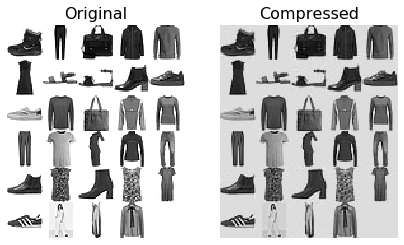

In [39]:
import matplotlib
import matplotlib.pyplot as plt

def plot_digits(instances, images_per_row=5, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")

plt.figure(figsize=(7, 4))
plt.subplot(121)
# Plotting 'original' image
plot_digits(X_train[::2100])
plt.title("Original", fontsize=16)
plt.subplot(122)
# Plotting the corresponding 'recovered' image
plot_digits(X_train_recovered[::2100])
plt.title("Compressed", fontsize=16)
plt.show()

In [40]:
from sklearn.model_selection import GridSearchCV

In [41]:
from xgboost import XGBClassifier

In [42]:
xgb_clf = XGBClassifier(n_estimators=20, max_depth=10, random_state=42)
# Scaling is not needed for Decision Tree algorithm and hence for Random Forest and XGBoost algorithms as they 
# are also based on Decision Trees. Hence, not using scaled training data set here
# For max_depth parameter, typical values are between 3 to 10. We have chosen 10
#xgb_clf.fit(X_train, y_train)

In [43]:
from sklearn.model_selection import GridSearchCV



In [44]:
param_grid = [
    # try (1x3)=3 combinations of hyperparameters
    {
     'rf__n_estimators': [20], 
     'rf__max_depth': [10,15],
     'lr__multi_class':["multinomial"],
     'lr__solver':["lbfgs"],
      'lr__C':[5],
    },
    
]


In [89]:

xgb_clf_grid_search = XGBClassifier(random_state=42)


In [45]:
log_clf_ens = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10, random_state=42)
rnd_clf_ens = RandomForestClassifier(n_estimators=20, max_depth=10, random_state=42)



In [46]:
voting_clf_grid_search = VotingClassifier(
    estimators=[('lr', log_clf_ens), ('rf', rnd_clf_ens)],
    voting='soft')


In [47]:
grid_search = GridSearchCV( voting_clf_grid_search,param_grid,cv=3,scoring='neg_mean_squared_error')

In [48]:
grid_search.fit(X_train_reduced, y_train)

/usr/local/anaconda/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/anaconda/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#lo

GridSearchCV(cv=3, error_score=nan,
             estimator=VotingClassifier(estimators=[('lr',
                                                     LogisticRegression(C=10,
                                                                        class_weight=None,
                                                                        dual=False,
                                                                        fit_intercept=True,
                                                                        intercept_scaling=1,
                                                                        l1_ratio=None,
                                                                        max_iter=100,
                                                                        multi_class='multinomial',
                                                                        n_jobs=None,
                                                                        penalty='l2',
                        

In [49]:
grid_search.best_params_

{'lr__C': 5,
 'lr__multi_class': 'multinomial',
 'lr__solver': 'lbfgs',
 'rf__max_depth': 15,
 'rf__n_estimators': 20}

In [50]:
grid_search.best_estimator_

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=5, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='multinomial',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=42,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                          

In [51]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

1.381882773609976 {'lr__C': 5, 'lr__multi_class': 'multinomial', 'lr__solver': 'lbfgs', 'rf__max_depth': 10, 'rf__n_estimators': 20}
1.3725220095381592 {'lr__C': 5, 'lr__multi_class': 'multinomial', 'lr__solver': 'lbfgs', 'rf__max_depth': 15, 'rf__n_estimators': 20}


In [16]:
sgd_scores = cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy") 

/usr/local/anaconda/lib/python3.6/site-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/anaconda/lib/python3.6/site-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/anaconda/lib/python3.6/site-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


In [19]:
sgd_scores

array([0.83695, 0.83365, 0.83575])

In [20]:
sgd_cv_scores  = sgd_scores

In [21]:
display_scores(sgd_cv_scores)

Scores: [0.83695 0.83365 0.83575]
Mean: 0.8354499999999999
Standard deviation: 0.0013638181696985737


In [65]:
import numpy as np
sgd_cv_accuracy = np.float64(0.8305999999999999)
sgd_cv_precision = np.float64(0.8305999999999999)
sgd_cv_recall  = np.float64(0.8305999999999999)
sgd_cv_f1_score = np.float64(0.8305999999999999)

In [42]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)

/usr/local/anaconda/lib/python3.6/site-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/anaconda/lib/python3.6/site-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/anaconda/lib/python3.6/site-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


In [44]:
y_train_pred

array([8, 8, 7, ..., 2, 2, 1], dtype=uint8)

In [63]:
confusion_matrix(y_train, y_train_pred)

array([[4756,   21,   90,  445,   21,    1,  579,    0,   87,    0],
       [  16, 5694,   37,  194,   14,    1,   41,    0,    3,    0],
       [  39,    5, 4366,   93,  757,    0,  685,    0,   55,    0],
       [ 220,   88,   71, 5216,  192,    0,  201,    0,   12,    0],
       [   5,    5,  574,  351, 4463,    0,  582,    0,   20,    0],
       [   3,    2,    5,   11,    1, 5503,   17,  259,   89,  110],
       [ 826,   17,  631,  350,  527,    0, 3478,    1,  169,    1],
       [   0,    0,    0,    0,    0,  337,    0, 5415,   16,  232],
       [  34,    3,   32,  120,   27,    7,  133,   29, 5609,    6],
       [   0,    1,    0,    6,    0,  102,    7,  253,    4, 5627]])

In [64]:
sgd_precision = precision_score(y_train, y_train_pred, average='weighted')
sgd_recall = recall_score(y_train, y_train_pred, average='weighted')
sgd_f1_score = f1_score(y_train, y_train_pred, average='weighted')

In [1]:
import pandas as pd
pointsdf = pd.read_csv("/cxldata/mltut/points.csv");

In [2]:
import numpy as np
points = np.array(pointsdf)

In [9]:
xs = points[:,0] 

In [10]:
ys = points[:,1] 

In [5]:
import matplotlib.pyplot as plt

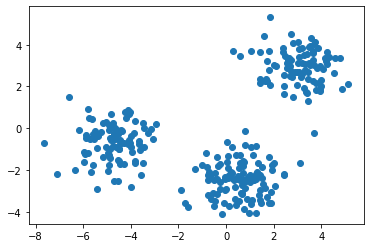

In [11]:
plt.scatter(xs,ys) 
plt.show()

In [12]:
from sklearn.cluster import KMeans